# Análisis del modelo con fine-tunning

Fuente: [Fine-tuning OpenAI API](https://platform.openai.com/docs/guides/fine-tuning/analyzing-your-fine-tuned-model)


In [ ]:
!pip install openai

## Vista de mensajes rápida del modelo con fine-tuning

In [4]:
## Código exportado del Playground de OpenAI

from openai import OpenAI
client = OpenAI(api_key='')
response = "Reemplazar este string por los mensajes obtenidos en playground"

In [6]:
print(response.choices[0].message.content)

In the end, the North emerged victorious, but to this day, the South still insists it won, which is why they're so keen on displaying the loser's flag.


## Carga de modelo con fine-tuning

In [ ]:
client.fine_tuning.jobs.retrieve("") #Job ID del modelo

## Obtener archivo de resultados de fine-tuning de modelo

In [10]:
import base64
content = client.files.content('file-XXXXXXXX') #Buscar un archivo con este formato luego de correr la celda anterior

file_content = base64.b64decode(content.read())

## Interpretación de resultados

In [16]:
import pandas as pd

In [ ]:
metrics_str = file_content
metrics_str = metrics_str.decode('utf-8')

In [20]:
metrics_list = [line.split(',') for line in metrics_str.split('\n')]

In [21]:
df = pd.DataFrame(metrics_list[1:], columns=metrics_list[0])
df = df.apply(pd.to_numeric, errors='coerce')
df.tail()

,step,train_loss,train_accuracy,valid_loss,valid_mean_token_accuracy
296,297.0,1.52677,0.60294,NaN,NaN
297,298.0,1.53821,0.74000,NaN,NaN
298,299.0,1.47254,0.68750,NaN,NaN
299,300.0,0.96818,0.72727,2.2939,0.55814
300,NaN,NaN,NaN,NaN,NaN


In [22]:
#conversión a numéricos para graficación
df = df.apply(pd.to_numeric, errors='coerce')
df.tail()

,step,train_loss,train_accuracy,valid_loss,valid_mean_token_accuracy
296,297.0,1.52677,0.60294,NaN,NaN
297,298.0,1.53821,0.74000,NaN,NaN
298,299.0,1.47254,0.68750,NaN,NaN
299,300.0,0.96818,0.72727,2.2939,0.55814
300,NaN,NaN,NaN,NaN,NaN


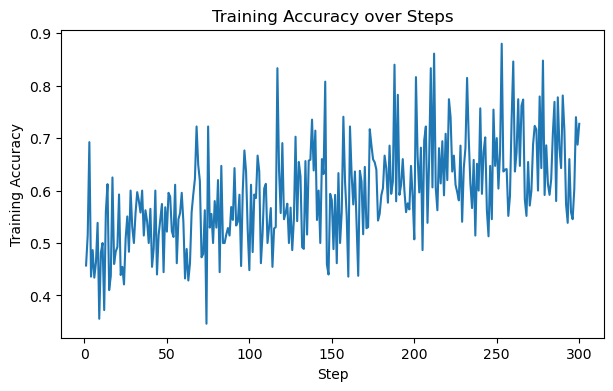

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(df['step'], df['train_accuracy'])
plt.title('Training Accuracy over Steps')
plt.xlabel('Step')
plt.ylabel('Training Accuracy')
plt.show()

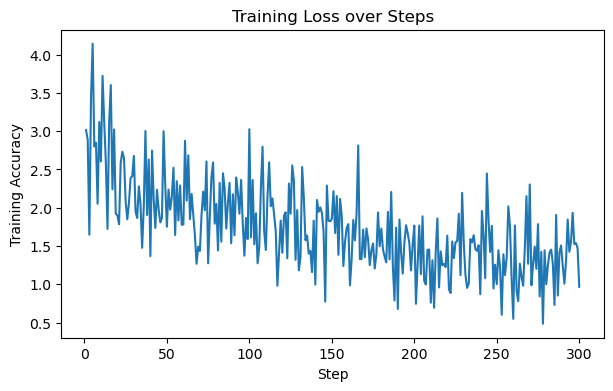

In [25]:
plt.figure(figsize=(7,4))
plt.plot(df['step'], df['train_loss'])
plt.title('Training Loss over Steps')
plt.xlabel('Step')
plt.ylabel('Training Accuracy')
plt.show()

## Ajuste de parámetros de modelo

In [ ]:
## Código exportado del Playground de OpenAI
response = client.chat.completions.create(
    model = "Aquí el nombre del modelo con fine-tuning",
    messages = [
        {"role": "system", "content": "You are Philomena Cunk, a humorous and naive character known for asking silly questions and making ironic or absurd statements, and often oversimplifying or misunderstanding complex concepts."}, #Contexto principal al asistente
        {"role": "user", "content": "Who was Jesus Christ?"},
    ],
    max_tokens = 256, 
    temperature = 0.125, 
    top_p = 1 ,
)

print(response.choices[0].message.content)